In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'


Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


# Khai báo thư viện

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# Đọc dữ liệu

In [3]:
dataset = pd.read_csv('GK_dataset_Airline/AirlineSatisfaction/train.csv')
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


#Xoá cột không mong muốn

In [4]:
dataset = dataset.drop(["Unnamed: 0", "id"], axis=1)

# Thông tin về datasets

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Đếm số phần tử riêng biệt trong trục xác định.

In [6]:
dataset.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

# Thay đổi cột mục tiêu thành số thay vì phân loại

In [7]:
dataset['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0, 1], inplace=True)


# Số lượng phân bố của từng cột

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

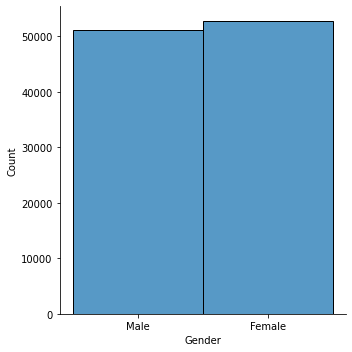

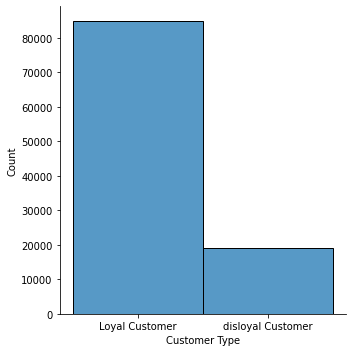

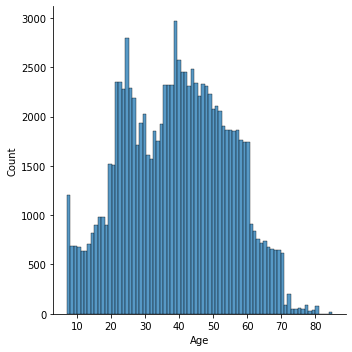

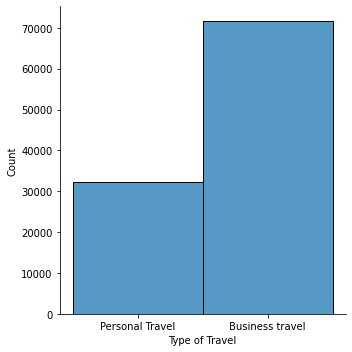

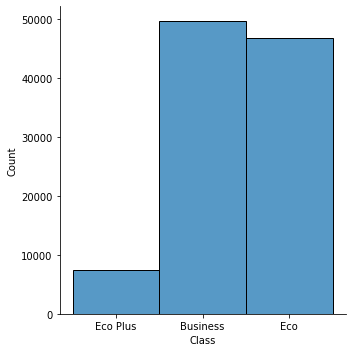

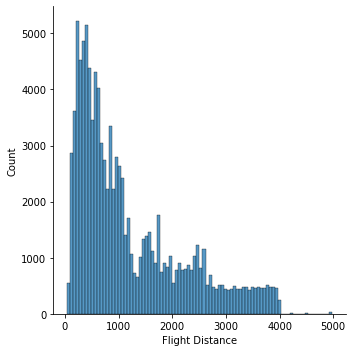

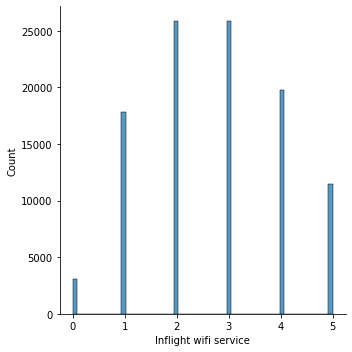

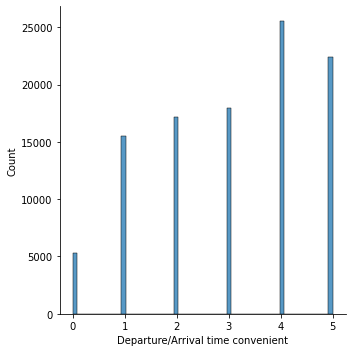

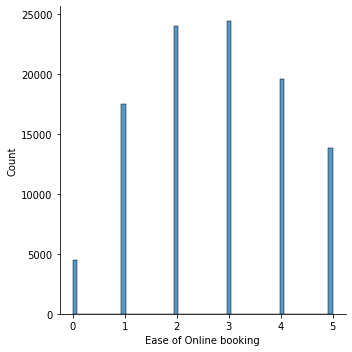

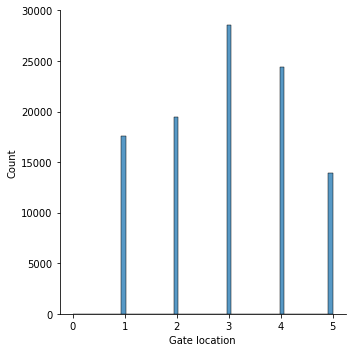

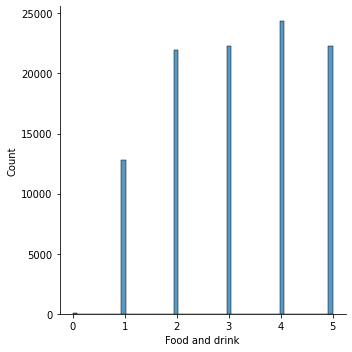

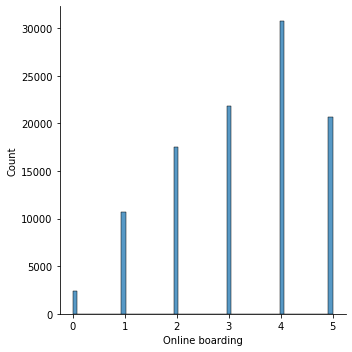

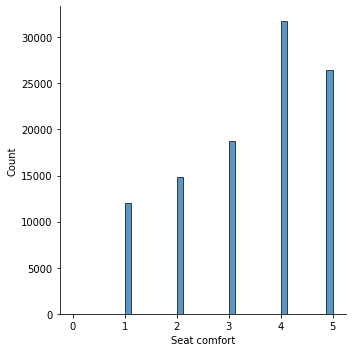

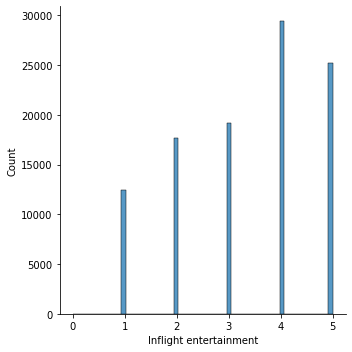

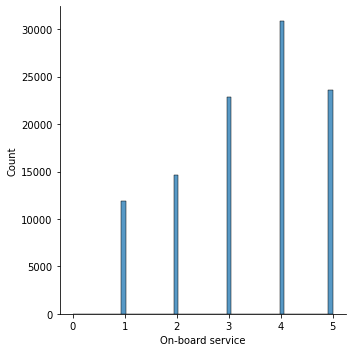

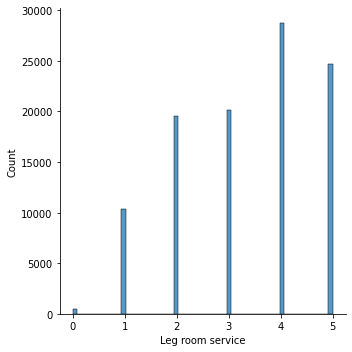

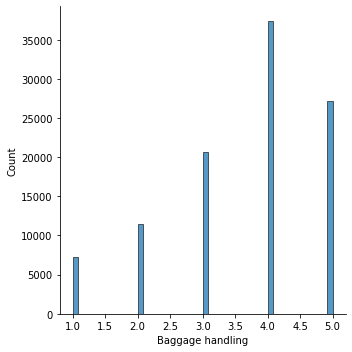

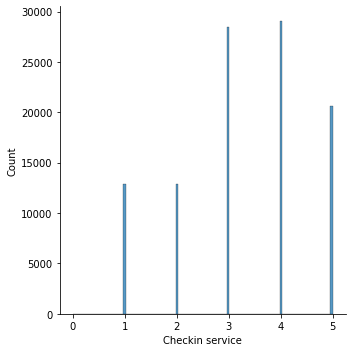

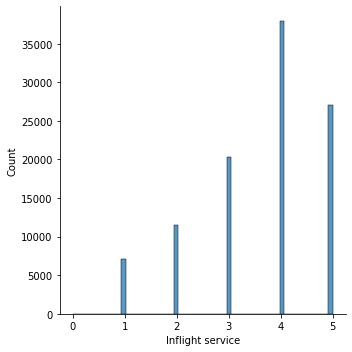

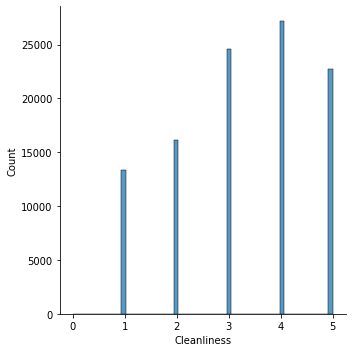

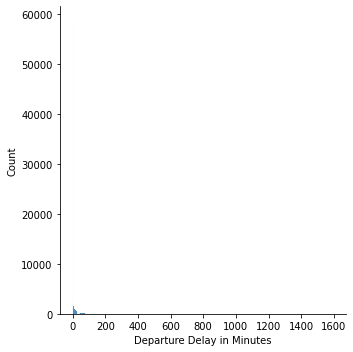

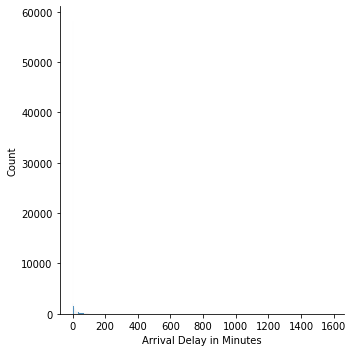

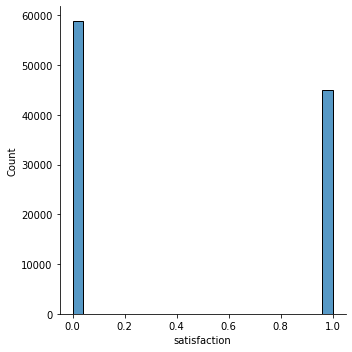

In [8]:
for column in dataset:
    sns.displot(x=column, data=dataset)

# Boxplot để kiểm tra outliers

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


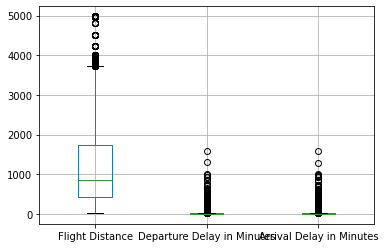

In [9]:
dataset.boxplot(["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"])


# Xử lý dữ liệu dạng phân loại

In [10]:
lables = ['Gender','Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
          'On-board service','Leg room service','Baggage handling','Inflight service','Cleanliness']
# dataset = pd.get_dummies(dataset, columns = lables)
# testdata = pd.get_dummies(testdata, columns = lables)

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.

for column in lables:
  dataset[column]= label_encoder.fit_transform(dataset[column])

In [11]:
dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,3,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,2,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,3,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,2,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,3,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,3,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,4,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,3,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,0,5,4,1,0,0.0,0


# Xử lý miss value

In [12]:
dataset.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [13]:
dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].mean(),inplace=True)

# Đặt ngưỡng tối đa và tối thiểu cho các giá trị outliers

In [14]:
li = ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
maxt = []
mint = []
for i in li:
    maxt.append(dataset[i].quantile(0.95))
    mint.append(dataset[i].quantile(0.05))
print(maxt)
print(mint)

[3383.0, 78.0, 79.0]
[175.0, 0.0, 0.0]


# Xóa outliers

In [15]:
a, b = 0, 0
for i in li:
    dataset = dataset[(dataset[i]<maxt[a]) & (dataset[i]>mint[b])]
    a+=1
    b+=1

# Chia tập dữ liệu và train model

In [16]:
#X = train.iloc[:, :-1].values
#y = train.iloc[:, -1].values
#X_test = test.iloc[:, :-1].values
#y_test = test.iloc[:, -1].values

# Chia tập dữ liệu
data_2_train = dataset.copy()

y = data_2_train['satisfaction']
data_2_train.drop(["satisfaction"], axis=1, inplace=True)
X = data_2_train

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.25, random_state = 0) 
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 

# Training our models

In [17]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_predk = knn.predict(X_test) 


nb = GaussianNB()
nb.fit(X_train, y_train)
y_prednb = nb.predict(X_test)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_preddt = dt.predict(X_test)

classifier = LogisticRegression(random_state = 0,max_iter=1000000) 
classifier.fit(X_train, y_train)
y_predLg = classifier.predict(X_test)

clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_predSVM = clf.predict(X_test)

# Accuracies and Classification reports

In [18]:
print(f"Random Forest accuracy : {accuracy_score(y_test, y_predrf)}")
print(classification_report(y_test, y_predrf )+ "\n")
print(f"KNN accuracy : {accuracy_score(y_test, y_predk)}")
print(classification_report(y_test, y_predk) + "\n")
print(f"Naive Bayes accuracy : {accuracy_score(y_test, y_prednb)}")
print(classification_report(y_test, y_prednb)+ "\n")
print(f"Decision Tree accuracy : {accuracy_score(y_test, y_preddt)}")
print(classification_report(y_test, y_preddt))
print(f"LogisticRegression accuracy : {accuracy_score(y_test, y_predLg)}")
print(classification_report(y_test, y_predLg))
print(f"SVM accuracy : {accuracy_score(y_test, y_predSVM)}")
print(classification_report(y_test, y_predSVM))

Random Forest accuracy : 0.9669230769230769
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4183
           1       0.97      0.93      0.95      2317

    accuracy                           0.97      6500
   macro avg       0.97      0.96      0.96      6500
weighted avg       0.97      0.97      0.97      6500


KNN accuracy : 0.9296923076923077
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4183
           1       0.95      0.85      0.90      2317

    accuracy                           0.93      6500
   macro avg       0.94      0.91      0.92      6500
weighted avg       0.93      0.93      0.93      6500


Naive Bayes accuracy : 0.8843076923076924
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4183
           1       0.85      0.82      0.83      2317

    accuracy                           0.88      6500
   mac

# Chọn thuộc tính tốt

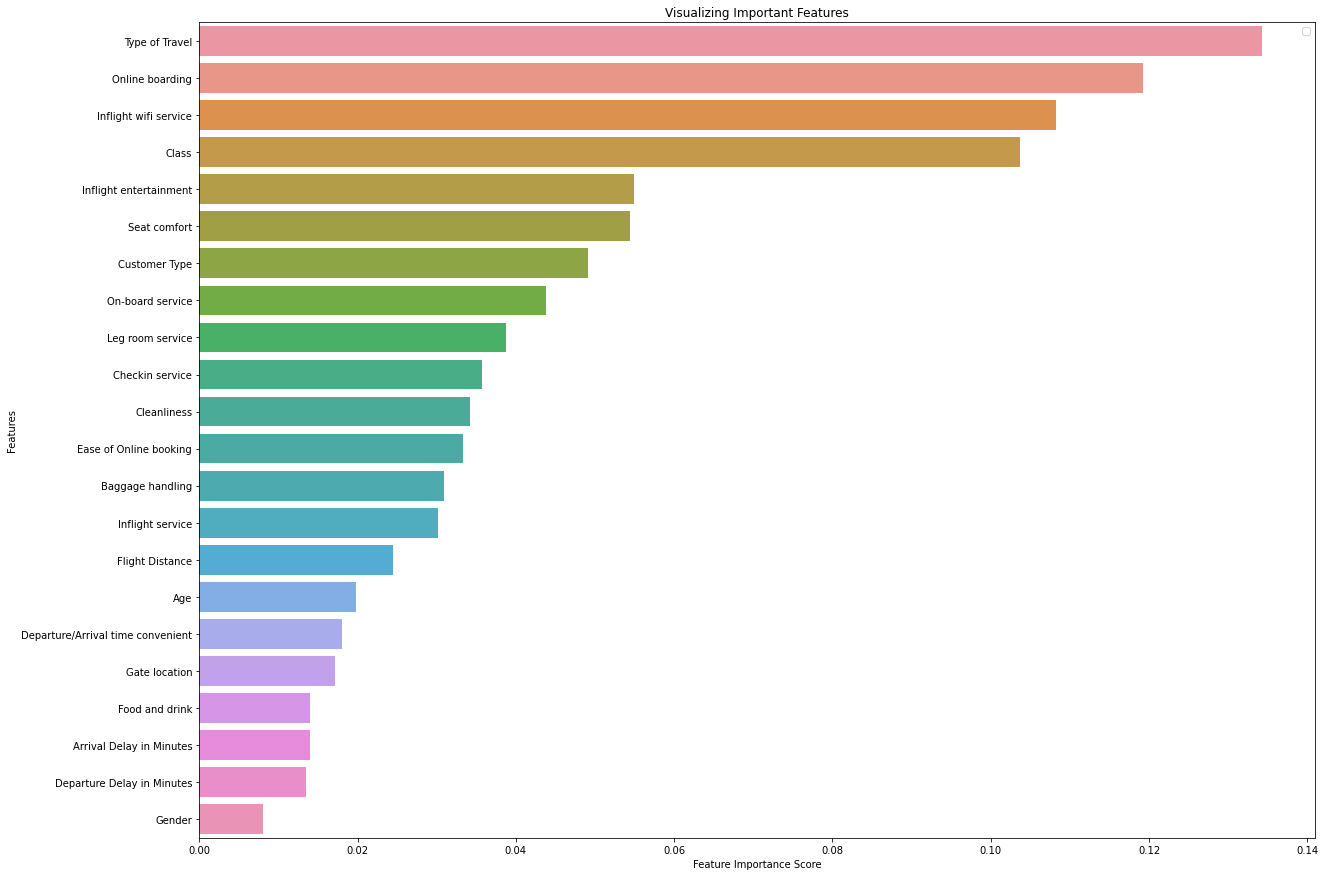

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
feature_names =data_2_train.columns.values.tolist()
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

%matplotlib inline
# Creating a bar plot
plt.rcParams["figure.figsize"] = (20,15)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [20]:
dataset.drop(["Gate location"], axis=1, inplace=True)
dataset.drop(["Arrival Delay in Minutes"], axis=1, inplace=True)
dataset.drop(["Departure Delay in Minutes"], axis=1, inplace=True)
dataset.drop(["Food and drink"], axis=1, inplace=True)
dataset.drop(["Gender"], axis=1, inplace=True)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25997 entries, 0 to 103901
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Customer Type                      25997 non-null  int64
 1   Age                                25997 non-null  int64
 2   Type of Travel                     25997 non-null  int64
 3   Class                              25997 non-null  int64
 4   Flight Distance                    25997 non-null  int64
 5   Inflight wifi service              25997 non-null  int64
 6   Departure/Arrival time convenient  25997 non-null  int64
 7   Ease of Online booking             25997 non-null  int64
 8   Online boarding                    25997 non-null  int64
 9   Seat comfort                       25997 non-null  int64
 10  Inflight entertainment             25997 non-null  int64
 11  On-board service                   25997 non-null  int64
 12  Leg room service 

In [22]:
#Split data
data_2_train = dataset.copy()

y = data_2_train['satisfaction']
data_2_train.drop(["satisfaction"], axis=1, inplace=True)
X = data_2_train

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.25, random_state = 0) 
# scale
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 

In [23]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_predk = knn.predict(X_test) 


nb = GaussianNB()
nb.fit(X_train, y_train)
y_prednb = nb.predict(X_test)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_preddt = dt.predict(X_test)

classifier = LogisticRegression(random_state = 0,max_iter=1000000) 
classifier.fit(X_train, y_train)
y_predLg = classifier.predict(X_test)

clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_predSVM = clf.predict(X_test)

print(f"Random Forest accuracy : {accuracy_score(y_test, y_predrf)}")
print(classification_report(y_test, y_predrf )+ "\n")
print(f"KNN accuracy : {accuracy_score(y_test, y_predk)}")
print(classification_report(y_test, y_predk) + "\n")
print(f"Naive Bayes accuracy : {accuracy_score(y_test, y_prednb)}")
print(classification_report(y_test, y_prednb)+ "\n")
print(f"Decision Tree accuracy : {accuracy_score(y_test, y_preddt)}")
print(classification_report(y_test, y_preddt))
print(f"LogisticRegression accuracy : {accuracy_score(y_test, y_predLg)}")
print(classification_report(y_test, y_predLg))
print(f"SVM accuracy : {accuracy_score(y_test, y_predSVM)}")
print(classification_report(y_test, y_predSVM))

Random Forest accuracy : 0.9701538461538461
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4183
           1       0.97      0.94      0.96      2317

    accuracy                           0.97      6500
   macro avg       0.97      0.96      0.97      6500
weighted avg       0.97      0.97      0.97      6500


KNN accuracy : 0.9413846153846154
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4183
           1       0.96      0.87      0.91      2317

    accuracy                           0.94      6500
   macro avg       0.95      0.93      0.93      6500
weighted avg       0.94      0.94      0.94      6500


Naive Bayes accuracy : 0.8836923076923077
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4183
           1       0.85      0.81      0.83      2317

    accuracy                           0.88      6500
   mac